<a href="https://colab.research.google.com/github/alvinhh01/CNNclassificationFashion/blob/main/CA1_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Plot mnist instances
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import learning_curve

fashion_mnist = tf.keras.datasets.fashion_mnist


# load (downloaded if needed) the MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.
# https://complex-valued-neural-networks.readthedocs.io/en/latest/code_examples/fashion_mnist.html

assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)



class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

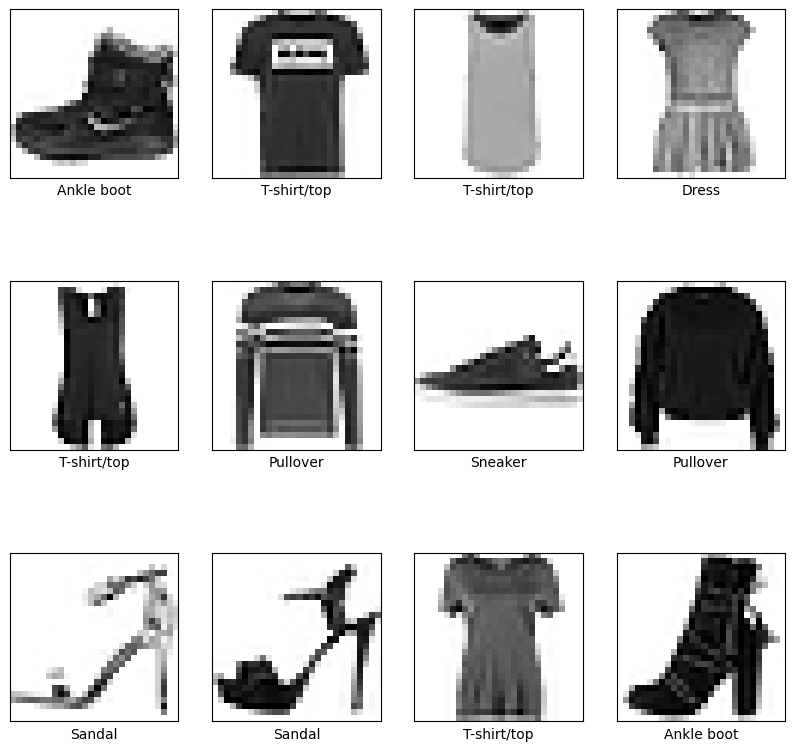

In [ ]:
plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
# Larger CNN Model
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils import to_categorical
from keras import backend as K

# fix random seed for reproducibility
seed = 88
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') #this will be the input shape in the subsequent model

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# build the model
# create model
model = Sequential()
model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu')) #input_Shape is the shape of the data
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten()) #flatten to 1 dimensional tensor
model.add(Dense(32, activation='relu')) # the number of nodes
model.add(Dense(64, activation='relu')) #hidden layer
model.add(Dense(num_classes, activation='softmax')) # fully connected layer probablities of each output class, which class is more likely
# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])



# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=10, batch_size=200) #batch size = how many samples are pass and process by the network every literation, going to train 10 times before the total training process, shuffle is by default (usually shuffle = true), verbose can be set 1 or 2, verbose - 2 can see the highest level of output
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 34s 106ms/step - accuracy: 0.6558 - loss: 1.0340 - val_accuracy: 0.9673 - val_loss: 0.1082
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 34s 114ms/step - accuracy: 0.9575 - loss: 0.1403 - val_accuracy: 0.9772 - val_loss: 0.0690
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 39s 108ms/step - accuracy: 0.9701 - loss: 0.0968 - val_accuracy: 0.9810 - val_loss: 0.0556
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 39s 102ms/step - accuracy: 0.9774 - loss: 0.0745 - val_accuracy: 0.9860 - val_loss: 0.0425
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 42s 105ms/step - accuracy: 0.9799 - loss: 0.0653 - val_accuracy: 0.9871 - val_loss: 0.0388
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 46s 122ms/step - accuracy: 0.9824 - loss: 0.0567 - val_accuracy: 0.9881 - val_loss: 0.0354
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 34s 113ms/step - accuracy: 0.9856 - loss: 0.0475 - val_accuracy: 0.9900 - val_loss: 0.0310
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 40s 110ms/step - accuracy: 0.9857 - loss: 0

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 30)     │           780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 15)     │         4,065 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 15)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 15)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 375)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        12,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,919 (230.16 KB)

 Trainable params: 19,639 (76.71 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 39,280 (153.44 KB)

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# 1. Predict
y_pred = model.predict(X_test)  # Shape: (10000, 10)

# 2. Convert predictions to class labels (e.g., 0–9)
y_pred_classes = np.argmax(y_pred, axis=1)

# 3. Convert one-hot encoded y_test to class labels if needed
if y_test.ndim == 2:
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test  # Already in label format

# 4. Now use the correct inputs
print(confusion_matrix(y_test_labels, y_pred_classes))
print(classification_report(y_test_labels, y_pred_classes, target_names=class_names))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
[[ 976    0    0    0    0    0    2    1    1    0]
 [   1 1129    1    0    0    1    2    1    0    0]
 [   0    2 1025    0    2    0    0    3    0    0]
 [   0    0    1 1003    0    2    0    1    3    0]
 [   0    0    0    0  975    0    2    0    1    4]
 [   2    0    0    4    0  883    2    0    0    1]
 [   3    1    0    0    1    1  951    0    1    0]
 [   0    3    5    2    0    0    0 1015    1    2]
 [   3    0    3    1    1    1    5    1  957    2]
 [   3    1    0    1    7    1    0    3    4  989]]
              precision    recall  f1-score   support

 T-shirt/top       0.99      1.00      0.99       980
     Trouser       0.99      0.99      0.99      1135
    Pullover       0.99      0.99      0.99      1032
       Dress       0.99      0.99      0.99      1010
        Coat       0.99      0.99      0.99       982
      Sandal       0.99      0.99      0.99       892
       Shirt       0.99      0.99      0.99      

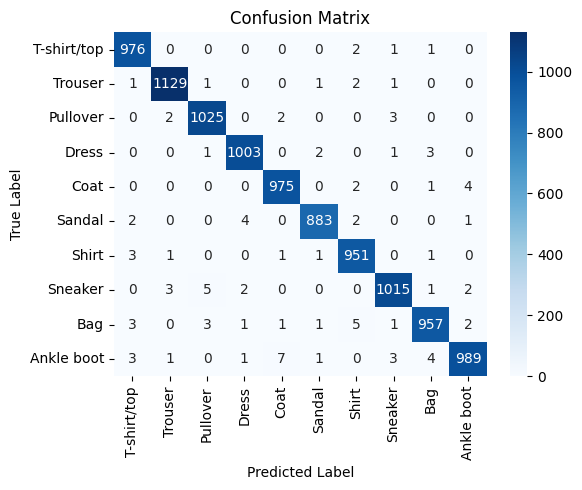

In [ ]:
# Confusion matrix for logistic regression
cm = confusion_matrix(y_test_labels, y_pred_classes)

# Plot
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()